# Case Study: Employee Attrition in Healthcare


Healthcare organizations face a significant challenge in retaining skilled and experienced employees. High employee attrition rates not only impact the overall workforce morale but also have financial implications. 
In this case study, I explored how different machine learning models can be leveraged to identify which employee might leave their job.

This proactive approach allows organizations to implement targeted measures, such as offering enhanced training programs, flexible work arrangements, and employee well-being initiatives, to create a supportive environment and mitigate attrition risks effectively.

In [1]:
# Import the NumPy library with the alias 'np' for numerical operations
import numpy as np

# Import the Seaborn library with the alias 'sns' for statistical data visualization
import seaborn as sns

# Import the Matplotlib library with the alias 'plt' for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Import the Pandas library with the alias 'pd' for data manipulation and analysis
import pandas as pd


In [2]:
# Read a CSV file into a Pandas DataFrame named 'df'
df = pd.read_csv("watson_healthcare_modified.csv")

## Exploratory Data Analysis

In [3]:
# Retrieve the dimensions (number of rows and columns) of the DataFrame 'df'
df.shape

(1676, 35)

In [4]:
# Retrieve the total number of elements in the DataFrame 'df'
df.size

58660

In [5]:
# Display concise information about the DataFrame 'df', including data types, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

There is no missing value in any of the coulmn. We can further visulaize it with heatmap.

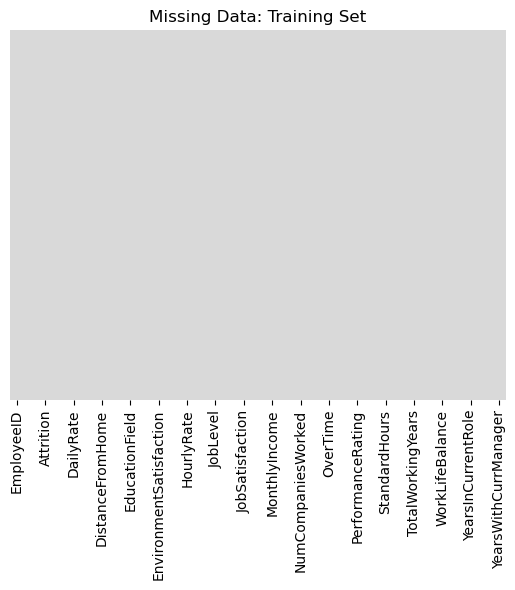

In [6]:
# Create a heatmap to visualize missing values in 'df'
# The 'df.isnull()' expression checks for missing values, returning a DataFrame of the same shape with True where values are missing and False otherwise
# The heatmap visualizes the distribution of missing values, using 'yticklabels=False' to hide y-axis labels, 'cbar=False' to hide the color bar, and 'cmap='tab20c_r'' for color mapping
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')

# Set the title for the heatmap
plt.title('Missing Data: Training Set')

# Display the heatmap
plt.show()

In [7]:
# Display the first 5 rows of 'df'.
df.head(5)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


As I have a DataFrame with a large number of columns, and when I use df.head(5) it shows only a subset of the columns with dots in between, it means that not all columns are displayed due to the default display settings.

To view all the columns in my DataFrame, I can adjust the display settings using the following method:

In [8]:
# Set Pandas option to display all columns in the output
pd.set_option('display.max_columns', None)

# Display the first 5 rows of the DataFrame 'df'.
print(df.head(5))

   EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0     1313919   41        No      Travel_Rarely       1102  Cardiology   
1     1200302   49        No  Travel_Frequently        279   Maternity   
2     1060315   37       Yes      Travel_Rarely       1373   Maternity   
3     1272912   33        No  Travel_Frequently       1392   Maternity   
4     1414939   27        No      Travel_Rarely        591   Maternity   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                 1          2  Life Sciences              1   
1                 8          1  Life Sciences              1   
2                 2          2          Other              1   
3                 3          4  Life Sciences              1   
4                 2          1        Medical              1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                 

Here's a description of each column in the provided data:

#### EmployeeID:
Unique identifier for each employee.


#### Age:
Age of the employee.


#### Attrition:
Binary variable indicating whether the employee has attrited (left the company) or not.


#### BusinessTravel:
Frequency of business travel.

Categories: 'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'.


#### DailyRate:
Daily rate of pay for the employee.


#### Department:
Department in which the employee works.


#### Categories:
'Cardiology', 'Maternity'.


#### DistanceFromHome:
Distance from home to work location.


#### Education:
Level of education of the employee.


#### Categories:
1 - 'Below College', 2 - 'College', 3 - 'Bachelor', 4 - 'Master', 5 - 'Doctor'.


#### EducationField:
Field of education of the employee.

Categories: 'Life Sciences', 'Other', 'Medical'.


#### EmployeeCount:
Number of employees, possibly a constant value (since non-null for all rows).


#### EnvironmentSatisfaction:
Employee's satisfaction with their work environment.

Categories: 1 - 'Low', 2 - 'Medium', 3 - 'High', 4 - 'Very High'.


#### Gender:
Gender of the employee.


#### HourlyRate:
Hourly rate of pay for the employee.


#### JobInvolvement:
Level of job involvement.

Categories: 1 - 'Low', 2 - 'Medium', 3 - 'High', 4 - 'Very High'.


#### JobLevel:
Level of the job within the organization hierarchy.


#### JobRole:
Role/title of the employee's job.

Categories: 'Nurse', 'Other'.


#### JobSatisfaction:
Employee's satisfaction with their job.

Categories: 1 - 'Low', 2 - 'Medium', 3 - 'High', 4 - 'Very High'.


#### MaritalStatus:
Marital status of the employee.

Categories: 'Single', 'Married'.


#### MonthlyIncome:
Monthly income of the employee.


#### MonthlyRate:
Monthly rate of pay for the employee.


#### NumCompaniesWorked:
Number of companies the employee has worked for.


#### Over18:
Indicates if the employee is over 18 years old.


#### OverTime:
Indicates if the employee works overtime.

Categories: 'Yes' or 'No'.


#### PercentSalaryHike:
The percentage increase in salary.


#### PerformanceRating:
Employee's performance rating.


#### RelationshipSatisfaction:
Employee's satisfaction with their relationships at work.

Categories: 1 - 'Low', 2 - 'Medium', 3 - 'High', 4 - 'Very High'.


#### StandardHours:
Standard number of working hours, possibly a constant value.


#### Shift:
Shift the employee works.


#### TotalWorkingYears:
Total number of years the employee has been working.


#### TrainingTimesLastYear:
Number of training times attended by the employee in the last year.

#### WorkLifeBalance:
Employee's perceived work-life balance.

Categories: 1 - 'Bad', 2 - 'Good', 3 - 'Better', 4 - 'Best'.


#### YearsAtCompany:
Number of years the employee has been with the company.


#### YearsInCurrentRole:
Number of years the employee has been in the current role.


#### YearsSinceLastPromotion:
Number of years since the employee's last promotion.


#### YearsWithCurrManager:
Number of years the employee has been with the current manager.

In [9]:
# Generate descriptive statistics of 'df'.
df.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,2.738663,6516.512530,14287.019690,2.662291,15.196897,3.150358,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,1.104005,4728.456618,7138.857783,2.477704,3.646550,0.357529,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2928.250000,7993.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,3.000000,4899.000000,14269.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,4.000000,8380.250000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


 After reviewing the columns in the provided dataset, it seems like some columns may not contribute significantly to the classification task like 'EmployeeID', 'EmployeeCount', 'Gender', 'MaritalStatus', 'Over18', 'StandardHours'. So its better to remove them from dataframe.

In [10]:
# List of column names to be dropped from the DataFrame 'df'
columns_to_drop = ['EmployeeID', 'EmployeeCount', 'Gender', 'MaritalStatus', 'Over18', 'StandardHours']

# Drop the specified columns from the DataFrame 'df' using the drop() method
# The 'columns' parameter specifies the list of columns to be dropped, and 'axis=1' indicates that columns are to be dropped
df = df.drop(columns=columns_to_drop, axis=1)

In [11]:
# Retrieve the new dimensions of 'df' after dropping specified columns
df.shape

(1676, 29)

We can see that only 29 features left after removing 6 features from previous datframe having 35 features.

As we can see that our target variable has b

In [12]:
# Mapping 'No' to 0 and 'Yes' to 1 in the 'Attrition' column
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

Now, we'll see the unique values in the categorical features so that we can convert them into dummy variables and pass it to the model.

In [13]:
# List of columns to check for unique categories
columns_to_check = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'OverTime']

# Loop through each column in the list
for column_name in columns_to_check:
    # Count the occurrences of each unique category in the specified column
    unique_categories = df[column_name].value_counts()
    
    # Print the unique categories in the current column
    print(f"Unique categories in '{column_name}':")
    print(unique_categories)
    print()

Unique categories in 'Attrition':
Attrition
0    1477
1     199
Name: count, dtype: int64

Unique categories in 'BusinessTravel':
BusinessTravel
Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: count, dtype: int64

Unique categories in 'Department':
Department
Maternity     796
Cardiology    531
Neurology     349
Name: count, dtype: int64

Unique categories in 'EducationField':
EducationField
Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: count, dtype: int64

Unique categories in 'JobRole':
JobRole
Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: count, dtype: int64

Unique categories in 'OverTime':
OverTime
No     1200
Yes     476
Name: count, dtype: int64



In [14]:
# List of columns to convert to the 'category' data type
objcat = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'OverTime']

# Loop through each column in the list and convert its data type to 'category'
for colname in objcat:
    df[colname] = df[colname].astype('category')

In [15]:
# Convert categorical variables into 'dummy' variables with drop_first to prevent multi-collinearity
businessTravel = pd.get_dummies(df['BusinessTravel'], drop_first=True)
department = pd.get_dummies(df['Department'], drop_first=True)
educationField = pd.get_dummies(df['EducationField'], drop_first=True)
jobRole = pd.get_dummies(df['JobRole'], drop_first=True)
overTime = pd.get_dummies(df['OverTime'], drop_first=True)

In [16]:
# Add new dummy columns to the DataFrame 'df' by concatenating them along the columns (axis=1)
df = pd.concat([df, businessTravel, department, educationField, jobRole, overTime], axis=1)

# Display the first 5 rows of the updated DataFrame
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Maternity,Neurology,Life Sciences,Marketing,Medical,Other,Technical Degree,Administrative,Nurse,Other,Therapist,Yes
0,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,94,3,2,Nurse,4,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,False,True,False,False,True,False,False,False,False,False,True,False,False,True
1,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,61,2,2,Other,2,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,False,False,True,False,False
2,37,1,Travel_Rarely,1373,Maternity,2,2,Other,4,92,2,1,Nurse,3,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,False,True,False,False,True
3,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,56,3,1,Other,3,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,True,False,True
4,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,40,3,1,Nurse,2,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,False,True,False,False,False


In [17]:
# Confirm changes
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Maternity,Neurology,Life Sciences,Marketing,Medical,Other,Technical Degree,Administrative,Nurse,Other,Therapist,Yes
0,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,94,3,2,Nurse,4,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,False,True,False,False,True,False,False,False,False,False,True,False,False,True
1,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,61,2,2,Other,2,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,False,False,True,False,False
2,37,1,Travel_Rarely,1373,Maternity,2,2,Other,4,92,2,1,Nurse,3,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,False,True,False,False,True
3,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,56,3,1,Other,3,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,True,False,True
4,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,40,3,1,Nurse,2,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,False,True,False,False,False


In [18]:
# Drop unnecessary columns from the DataFrame 'df'
# The specified columns ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'OverTime'] are removed along the columns (axis=1)
# The 'inplace=True' parameter modifies the DataFrame in place, without the need for reassignment
df.drop(['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'OverTime'], axis=1, inplace=True)

# Display the shape of the updated DataFrame 'df'
print('train_data shape', df.shape)

# Display the first few rows of the updated DataFrame to confirm changes
df.head()

train_data shape (1676, 38)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Maternity,Neurology,Life Sciences,Marketing,Medical,Other,Technical Degree,Administrative,Nurse,Other,Therapist,Yes
0,41,0,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,False,True,False,False,True,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,False,True,False,False,True
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,False,True,False,False,False


In [19]:
# Print the column names of the DataFrame 'df' after the previous column modifications
print(df.columns)

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Travel_Frequently',
       'Travel_Rarely', 'Maternity', 'Neurology', 'Life Sciences', 'Marketing',
       'Medical', 'Other', 'Technical Degree', 'Administrative', 'Nurse',
       'Other', 'Therapist', 'Yes'],
      dtype='object')


In [20]:
# Convert boolean columns to integer (0 or 1) 

# Loop through each column in the 'businessTravel' dummy variables
for col in businessTravel.columns:
    df[col] = df[col].astype(int)

# Loop through each column in the 'department' dummy variables
for col in department.columns:
    df[col] = df[col].astype(int)

# Loop through each column in the 'educationField' dummy variables
for col in educationField.columns:
    df[col] = df[col].astype(int)

# Loop through each column in the 'jobRole' dummy variables
for col in jobRole.columns:
    df[col] = df[col].astype(int)

# Loop through each column in the 'overTime' dummy variables
for col in overTime.columns:
    df[col] = df[col].astype(int)

In [21]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely,Maternity,Neurology,Life Sciences,Marketing,Medical,Other,Technical Degree,Administrative,Nurse,Other,Therapist,Yes
0,41,0,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0


## Separate the dataset and split it into training and testing set

We will spilt the Full dataset into Input and target variables

Input is also called Feature Variables Output referes to Target variables

In [22]:
# Separate the DataFrame 'df' into features (x) and target variable (y)

# Features (x): Exclude the 'Attrition' column from the DataFrame
x = df.drop('Attrition', axis=1)

# Target variable (y): Select only the 'Attrition' column from the DataFrame
y = df['Attrition']

In [23]:
x.shape

(1676, 37)

In [24]:
y.shape

(1676,)

In [25]:
from sklearn import preprocessing
# Standardize the features using the StandardScaler from scikit-learn

# Create a StandardScaler object and fit it to the features (x)
pre_process = preprocessing.StandardScaler().fit(x)

# Transform the features using the fitted scaler to standardize the data
x_transform = pre_process.transform(x)

In [26]:
# Split the data into training and testing sets using train_test_split from scikit-learn

# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the standardized features (x_transform) and target variable (y) into training and testing sets
# The 'test_size' parameter sets the proportion of the dataset to include in the test split
# The 'random_state' parameter ensures reproducibility by fixing the random seed for the split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size=0.20, random_state=101)

## Logistic Regression Model Training

In [27]:
# Import the LogisticRegression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
lreg = LogisticRegression()

# Pass the training data (features and target) into the model for training
lreg.fit(x_train, y_train)


LogisticRegression()

In [28]:
# Logistic Regression Model Prediction

# Use the trained Logistic Regression model to predict the target variable for the test data
y_pred_lreg = lreg.predict(x_test)

# Print the predicted values for the target variable
print(y_pred_lreg)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 0]


In [29]:
# Predict Probabilities using Logistic Regression Model

# Use the trained Logistic Regression model to predict probabilities for the positive class (class 1) on the test data
probabilities = lreg.predict_proba(x_test)[:, 1]

# Print the shape of the predicted probabilities array
print(probabilities.shape)

# Print the predicted probabilities for the positive class
print(probabilities)

(336,)
[1.22072549e-03 1.00060729e-01 9.36595223e-02 4.46888811e-02
 3.45509757e-02 4.27670420e-03 2.43034926e-03 1.86049653e-02
 5.96411732e-03 5.34877920e-04 6.52196671e-03 5.80185010e-02
 1.17020983e-01 6.17945471e-04 7.83836364e-01 6.96320496e-01
 6.64017905e-03 1.08544098e-01 3.07052718e-01 6.85132098e-03
 3.40669014e-03 3.17906591e-01 2.16238286e-05 2.19607220e-04
 6.67970252e-03 2.75685883e-01 3.18736373e-01 8.36779065e-01
 1.05919595e-03 9.26904419e-02 1.01644486e-02 1.03972021e-03
 1.10233510e-04 8.72060556e-04 1.21789101e-03 2.69928381e-03
 1.38147509e-03 1.57985507e-03 9.74208696e-07 2.98594893e-02
 2.25401744e-03 6.88970344e-01 6.00554709e-02 2.32303511e-01
 3.52524715e-02 1.67213873e-04 2.17784735e-01 1.13679895e-01
 1.53590702e-01 2.67192941e-02 3.28886399e-02 9.14579109e-02
 2.25513126e-03 2.02198165e-04 5.05714153e-01 1.49805817e-02
 4.86064945e-05 5.13683934e-03 2.40529670e-01 7.88546026e-01
 3.65261157e-02 1.69168098e-02 6.27424630e-01 4.25538347e-04
 1.06466470e-03 4

In [30]:
# Display Predicted Probabilities and Predicted Labels for each instance in the test set

# Iterate through each instance in the test set
for i in range(len(y_test)):
    # Print the rounded predicted probability and the corresponding predicted label
    print(round(probabilities[i], 3), " --> ", y_pred_lreg[i])

0.001  -->  0
0.1  -->  0
0.094  -->  0
0.045  -->  0
0.035  -->  0
0.004  -->  0
0.002  -->  0
0.019  -->  0
0.006  -->  0
0.001  -->  0
0.007  -->  0
0.058  -->  0
0.117  -->  0
0.001  -->  0
0.784  -->  1
0.696  -->  1
0.007  -->  0
0.109  -->  0
0.307  -->  0
0.007  -->  0
0.003  -->  0
0.318  -->  0
0.0  -->  0
0.0  -->  0
0.007  -->  0
0.276  -->  0
0.319  -->  0
0.837  -->  1
0.001  -->  0
0.093  -->  0
0.01  -->  0
0.001  -->  0
0.0  -->  0
0.001  -->  0
0.001  -->  0
0.003  -->  0
0.001  -->  0
0.002  -->  0
0.0  -->  0
0.03  -->  0
0.002  -->  0
0.689  -->  1
0.06  -->  0
0.232  -->  0
0.035  -->  0
0.0  -->  0
0.218  -->  0
0.114  -->  0
0.154  -->  0
0.027  -->  0
0.033  -->  0
0.091  -->  0
0.002  -->  0
0.0  -->  0
0.506  -->  1
0.015  -->  0
0.0  -->  0
0.005  -->  0
0.241  -->  0
0.789  -->  1
0.037  -->  0
0.017  -->  0
0.627  -->  1
0.0  -->  0
0.001  -->  0
0.0  -->  0
0.002  -->  0
0.0  -->  0
0.021  -->  0
0.0  -->  0
0.6  -->  1
0.006  -->  0
0.001  -->  0
0.46  -

## Different Evaluation Metrics for Logistic Regression Model

In [31]:
# Evaluate the Logistic Regression Model

# Import necessary metrics from scikit-learn
from sklearn.metrics import classification_report, accuracy_score

# Print header for the classification model evaluation
print('Classification Model')
print('--'*30)

# Calculate and print the accuracy of the Logistic Regression model
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100, 2)
print('Accuracy', logreg_accuracy, '%')

Classification Model
------------------------------------------------------------
Accuracy 95.54 %


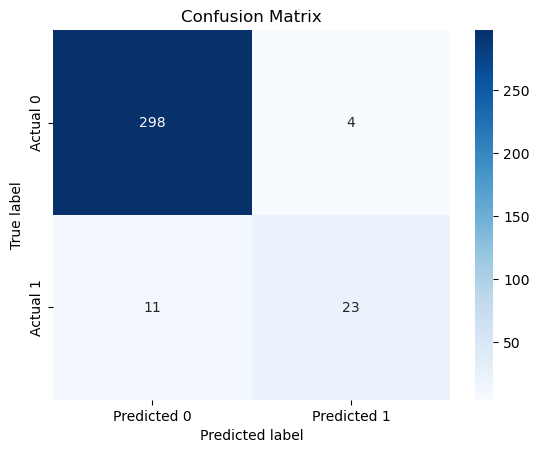

In [32]:
# Generate and Visualize Confusion Matrix

# Import the confusion_matrix function from scikit-learn
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the Logistic Regression model
conf_matrix = confusion_matrix(y_test, y_pred_lreg)

# Create a heatmap to visualize the confusion matrix
# 'annot=True' displays the values in each cell, 'fmt='d'' formats the values as integers
# 'cmap='Blues'' sets the color map for the heatmap
# 'xticklabels' and 'yticklabels' are used to label the axes
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

# Set labels and title for the heatmap
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Display the heatmap
plt.show()

Logistic Regression Metrics:
Precision: 0.8519
Recall: 0.6765
F1 Score: 0.7541
ROC AUC: 0.8316


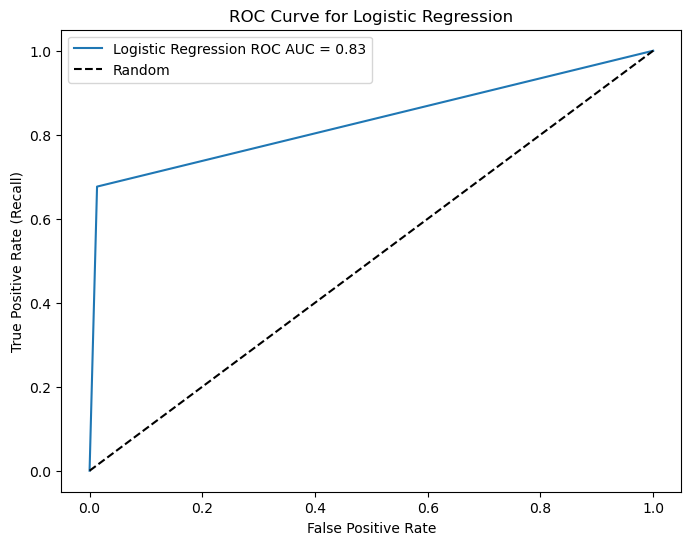

In [33]:
# Import necessary functions and libraries for Logistic Regression Metrics and ROC Curve
from sklearn.linear_model import LogisticRegression  # Import the LogisticRegression model
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve  # Import necessary metrics
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Create an instance of Logistic Regression model
lreg = LogisticRegression()  # Instantiate the Logistic Regression model

# Train the Logistic Regression model on the training data
lreg.fit(x_train, y_train)  # Fit the model using the training data

# Use the trained model to predict the target variable for the test data
y_pred_lreg = lreg.predict(x_test)  # Make predictions on the test data

# Calculate evaluation metrics for Logistic Regression
precision_lreg = precision_score(y_test, y_pred_lreg)  # Calculate precision
recall_lreg = recall_score(y_test, y_pred_lreg)  # Calculate recall
f1_lreg = f1_score(y_test, y_pred_lreg)  # Calculate F1 score
roc_auc_lreg = roc_auc_score(y_test, y_pred_lreg)  # Calculate ROC AUC score

# Print Logistic Regression Metrics
print(f'Logistic Regression Metrics:')
print(f'Precision: {precision_lreg:.4f}')
print(f'Recall: {recall_lreg:.4f}')
print(f'F1 Score: {f1_lreg:.4f}')
print(f'ROC AUC: {roc_auc_lreg:.4f}')

# Plot ROC Curve for Logistic Regression
fpr_lreg, tpr_lreg, thresholds_lreg = roc_curve(y_test, y_pred_lreg)  # Compute ROC curve values
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(fpr_lreg, tpr_lreg, label=f'Logistic Regression ROC AUC = {roc_auc_lreg:.2f}')  # Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--', label='Random')  # Plot the diagonal line for random classification
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Logistic Regression')  # Set the title
plt.legend()  # Display legend
plt.show()  # Show the plot

It may seen through confusion matrix that model performs well on both classes.

## Decision Tree Model Training

In [34]:
# Import model
from sklearn.tree import DecisionTreeClassifier

# Create instance of model
dt = DecisionTreeClassifier()

# Pass training data into model
dt.fit(x_train, y_train)
 
# Predict
y_pred_dt = dt.predict(x_test)

# Score It
from sklearn.metrics import accuracy_score

print('Classification Model')
# Accuracy
print('--'*30)
dt_accuracy = round(accuracy_score(y_test, y_pred_dt) * 100,2)
print('Accuracy', dt_accuracy,'%')

Classification Model
------------------------------------------------------------
Accuracy 88.39 %


## Different Evaluation Metrics for Decision Tree Model

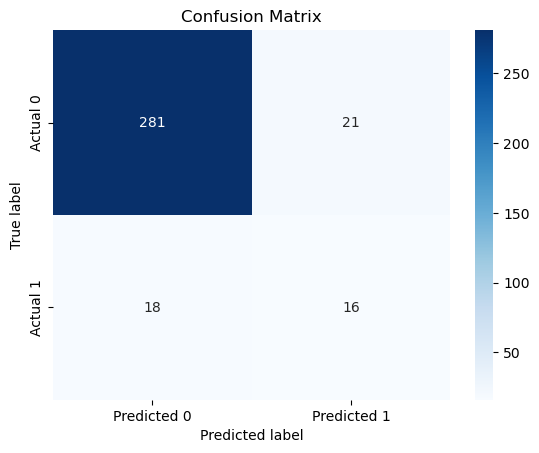

In [35]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Here confusion matrix shows that model does not perform well on positive class due to class imbalance.

Decision Tree Metrics:
Precision: 0.4324
Recall: 0.4706
F1 Score: 0.4507
ROC AUC: 0.7005


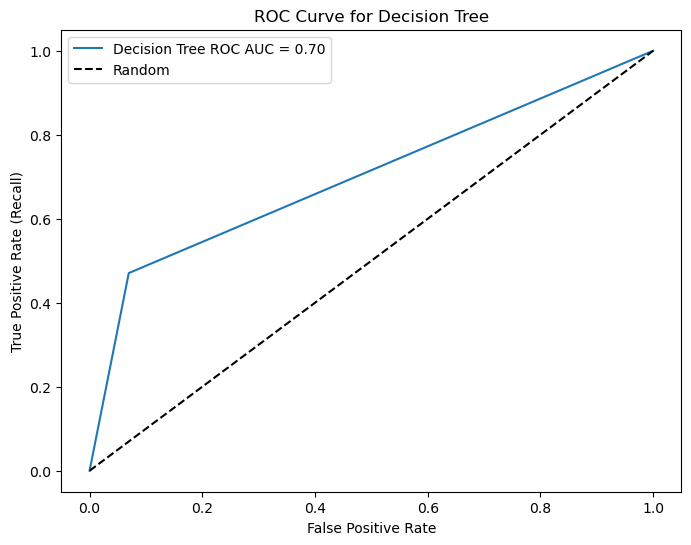

In [37]:
# Calculate evaluation metrics
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

print(f'Decision Tree Metrics:')
print(f'Precision: {precision_dt:.4f}')
print(f'Recall: {recall_dt:.4f}')
print(f'F1 Score: {f1_dt:.4f}')
print(f'ROC AUC: {roc_auc_dt:.4f}')

# Plot ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree ROC AUC = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.show()

## Random Forest Model Training

In [38]:
# Import model
from sklearn.ensemble import RandomForestClassifier

# Create instance of model
rf = RandomForestClassifier()

# Pass training data into model
rf.fit(x_train, y_train)

# Predict
y_pred_rf = rf.predict(x_test) 

# Score It
from sklearn.metrics import accuracy_score

print('Classification Model')
# Accuracy
print('--'*30)
rf_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100,2)
print('Accuracy', dt_accuracy,'%')   

Classification Model
------------------------------------------------------------
Accuracy 88.39 %


## Evaluation metrics for Random Forest model

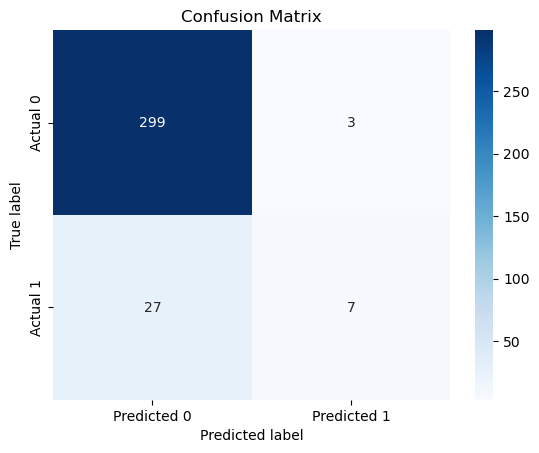

In [39]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Random Forest Metrics:
Precision: 0.7000
Recall: 0.2059
F1 Score: 0.3182
ROC AUC: 0.5980


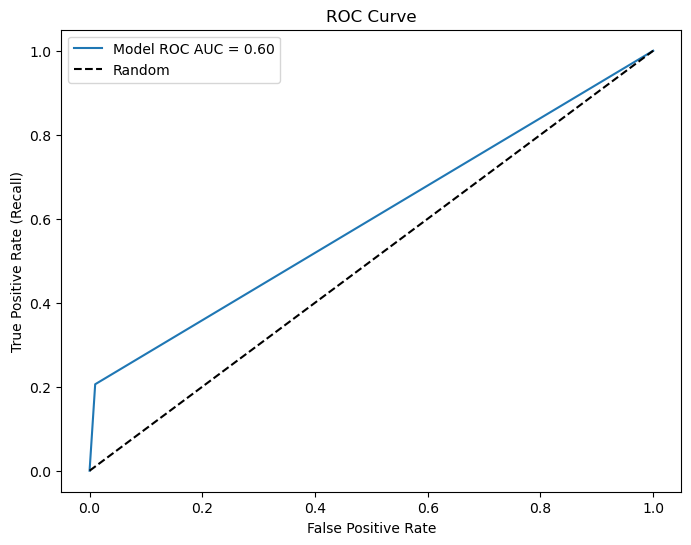

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming y_test and y_pred_rf are the true labels and predicted labels from your model
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f'Random Forest Metrics:')
print(f'Precision: {precision_rf:.4f}')
print(f'Recall: {recall_rf:.4f}')
print(f'F1 Score: {f1_rf:.4f}')
print(f'ROC AUC: {roc_auc_rf:.4f}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Model ROC AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Gradient Boosting Model Training

In [41]:
# Import model
from sklearn.ensemble import GradientBoostingClassifier

# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)

# Predict
y_pred_gbc = gbc.predict(x_test) 

# Score It
from sklearn.metrics import accuracy_score

print('Classification Model')
# Accuracy
print('--'*30)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100,2)
print('Accuracy', dt_accuracy,'%')  

Classification Model
------------------------------------------------------------
Accuracy 88.39 %


## Different Evaluation Metrics for Gradient Boosting Model

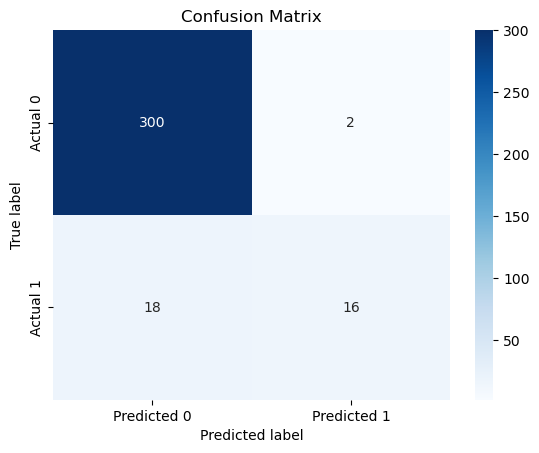

In [42]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_gbc)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Gradient Boosting Metrics:
Precision: 0.8889
Recall: 0.4706
F1 Score: 0.6154
ROC AUC: 0.7320


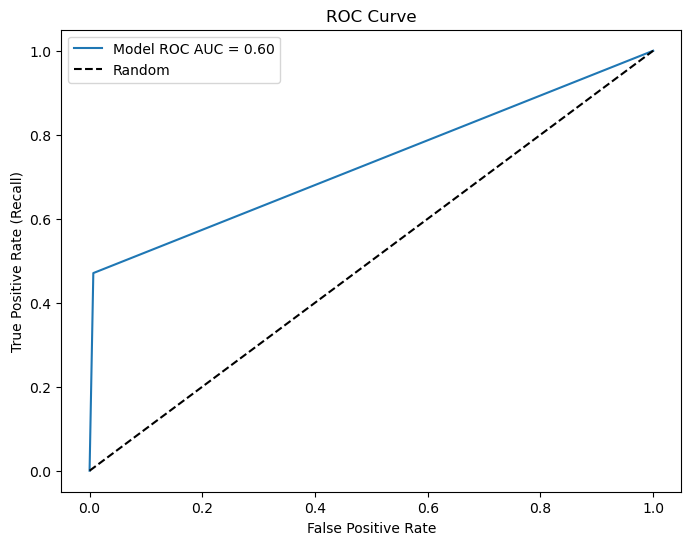

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming y_test and y_pred_rf are the true labels and predicted labels from your model
precision_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)
roc_auc_gbc = roc_auc_score(y_test, y_pred_gbc)

print(f'Gradient Boosting Metrics:')
print(f'Precision: {precision_gbc:.4f}')
print(f'Recall: {recall_gbc:.4f}')
print(f'F1 Score: {f1_gbc:.4f}')
print(f'ROC AUC: {roc_auc_gbc:.4f}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gbc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Model ROC AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Ranking of different models

In [44]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": logreg_accuracy,
    "Decision Tree Classifier": dt_accuracy,
    "Random Forest Classifier": rf_accuracy,
    "Gradient Boosting Classifier": gbc_accuracy
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

Model Rankings (Greater Values are better):
1. Logistic Regression: 95.54
2. Gradient Boosting Classifier: 94.05
3. Random Forest Classifier: 91.07
4. Decision Tree Classifier: 88.39
